In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
key = 'f01357585fe80c0597e5f63e93e06194cab9c2854924637bde99e13c5a34a726'

In [3]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [4]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [5]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [6]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [7]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [8]:
def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [9]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [10]:
%time
price('LTC',exchange='Coinbase')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


{'USD': 67.64}

In [11]:
%time
price('NEO',['BTC','ETH','USD'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


{'BTC': 0.001318, 'ETH': 0.06406, 'USD': 12.15}

In [12]:
%time
df = daily_price_historical('BTC','USD')
print('Max lenght = %s' %len(df))
print('Max Time = %s' %(df.timestamp.max() - df.timestamp.min()))
df.tail()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Max lenght = 3490
Max Time = 3488 days 23:00:00


,time,close,high,low,open,volumefrom,volumeto,timestamp
3485,1580428800,9342.23,9518.87,9208.36,9501.38,31334.26,2.926278e+08,2020-01-31 01:00:00
3486,1580515200,9384.45,9455.92,9296.57,9342.23,14778.25,1.386141e+08,2020-02-01 01:00:00
3487,1580601600,9334.25,9469.84,9169.21,9384.45,24059.37,2.253226e+08,2020-02-02 01:00:00
3488,1580688000,9288.96,9605.66,9230.83,9334.25,33363.87,3.123151e+08,2020-02-03 01:00:00
3489,1580774400,9168.16,9347.12,9089.52,9288.96,25982.15,2.391889e+08,2020-02-04 01:00:00


In [13]:
df.columns = ['Time', 'Close', 'High', 'Low', 'Open', 'Volumefrom', 'Volumeto','Timestamp']

In [14]:
df.tail()

,Time,Close,High,Low,Open,Volumefrom,Volumeto,Timestamp
3485,1580428800,9342.23,9518.87,9208.36,9501.38,31334.26,2.926278e+08,2020-01-31 01:00:00
3486,1580515200,9384.45,9455.92,9296.57,9342.23,14778.25,1.386141e+08,2020-02-01 01:00:00
3487,1580601600,9334.25,9469.84,9169.21,9384.45,24059.37,2.253226e+08,2020-02-02 01:00:00
3488,1580688000,9288.96,9605.66,9230.83,9334.25,33363.87,3.123151e+08,2020-02-03 01:00:00
3489,1580774400,9168.16,9347.12,9089.52,9288.96,25982.15,2.391889e+08,2020-02-04 01:00:00


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


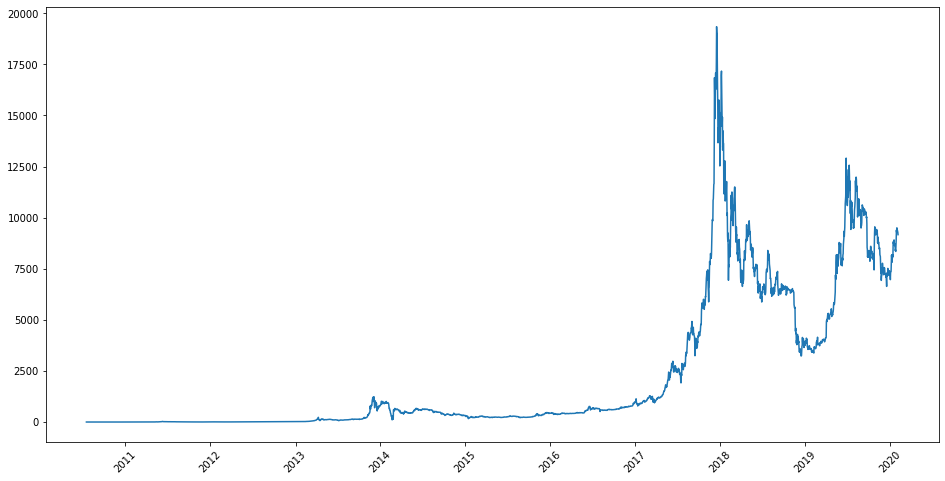

In [15]:
%time
plt.figure(figsize=(16,8))
plt.plot(df.Timestamp,df.Close)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
%time
time_delta = 1
df = hourly_price_historical('BTC','USD',limit=2000,aggregate=time_delta)
print('Max lenght = %s' %len(df))
print('Max Time = %s' %(df.timestamp.max() - df.timestamp.min()))

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df.timestamp,df.close)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.tail()

In [ ]:
%time 
time_delta = 1
df = minute_price_historical('BTC','USD',2000,time_delta)
print('Max lenght = %s' %len(df))
print('Max Time = %s' %(df.timestamp.max() - df.timestamp.min()))

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df.timestamp,df.close)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [ ]:
data = coin_list()
RenderJSON(data)

In [ ]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}

In [ ]:
data = coin_snapshot_full_by_id('ETH',symbol_id_dict)
RenderJSON(data)

In [ ]:
url = 'https://min-api.cryptocompare.com/data/blockchain/list?api_key=f01357585fe80c0597e5f63e93e06194cab9c2854924637bde99e13c5a34a726'
page = requests.get(url)
data = page.json()

In [ ]:
df = pd.DataFrame(data['Data']).T
df

In [ ]:
TICKERS = []
TICKERS = set(df.symbol)
len(TICKERS)

In [ ]:
df.data_available_from.min(),df.data_available_from.max()